https://people.duke.edu/~ccc14/sta-663/TextProcessingExtras.html

In [225]:
import requests
import gensim
import re
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
pride_and_prejudice_url = 'http://www.gutenberg.org/files/1342/1342-0.txt'
emma_url = 'http://www.gutenberg.org/files/158/158-0.txt'

def get_book(url):
    raw = requests.get(url).text
    start = re.search(r"\*\*\* START OF THIS PROJECT GUTENBERG EBOOK .* \*\*\*",raw ).end()
    stop = re.search(r"End of the Project Gutenberg EBook", raw).start()
    text = raw[start:stop]
    return text


def preprocess(sentence): 
    return re.sub('[^A-Za-z0-9.]+', ' ', sentence).lower().split(".")
    

def get_book_corpus(book_url):
    book = get_book(book_url)
    processed_book = preprocess(book)
    corpus = [sentence.split(" ") for sentence in processed_book]
    return corpus


In [20]:
pride_and_prejudice = get_book_corpus(pride_and_prejudice_url)
emma = get_book_corpus(emma_url)

In [21]:
corpus = pride_and_prejudice+emma

In [22]:
from nltk.corpus import stopwords

In [211]:
stopwords_list = stopwords.words('english')

In [212]:
final_corpus = []
for sentence in corpus:
    dummy = []
    for word in sentence:
        if word not in stopwords_list:
            dummy.append(word)
    final_corpus.append(dummy)

In [218]:
model = gensim.models.Word2Vec(final_corpus, size=300, window=6, min_count=60,seed = 2)

In [219]:
model.wv.similarity('darcy','elizabeth')

0.99965412766116224

In [220]:
model.wv.most_similar('bennet')

[('bingley', 0.9996611475944519),
 ('smith', 0.9993113875389099),
 ('darcy', 0.9992998242378235),
 ('elton', 0.9990981817245483),
 ('mrs', 0.9990918636322021),
 ('weston', 0.9990203976631165),
 ('elizabeth', 0.9989531636238098),
 ('chapter', 0.9989190101623535),
 ('mr', 0.9989141821861267),
 ('gardiner', 0.9988851547241211)]

In [222]:
model.wv.most_similar('emma')

[('smile', 0.9997602105140686),
 ('true', 0.9997509121894836),
 ('voice', 0.9997480511665344),
 ('satisfied', 0.9997459053993225),
 ('impossible', 0.9997458457946777),
 ('thoughts', 0.9997414946556091),
 ('words', 0.999740719795227),
 ('side', 0.9997382760047913),
 ('towards', 0.9997373223304749),
 ('forward', 0.9997367262840271)]

In [223]:
model.wv.most_similar('harriet')

[('affection', 0.9997930526733398),
 ('something', 0.999782383441925),
 ('natural', 0.99978107213974),
 ('mind', 0.999778687953949),
 ('attachment', 0.9997770190238953),
 ('thought', 0.9997765421867371),
 ('change', 0.9997761845588684),
 ('manners', 0.999769389629364),
 ('believed', 0.9997662305831909),
 ('able', 0.9997622966766357)]

In [224]:
model.wv.most_similar('bingley')

[('bennet', 0.9996610879898071),
 ('smith', 0.9994538426399231),
 ('bates', 0.9992308616638184),
 ('darcy', 0.9989596009254456),
 ('woodhouse', 0.9986859560012817),
 ('fairfax', 0.9986021518707275),
 ('mrs', 0.9985418915748596),
 ('elton', 0.9985324740409851),
 ('elizabeth', 0.9985102415084839),
 ('weston', 0.9983983039855957)]

In [159]:
len(model.wv.vocab)

238

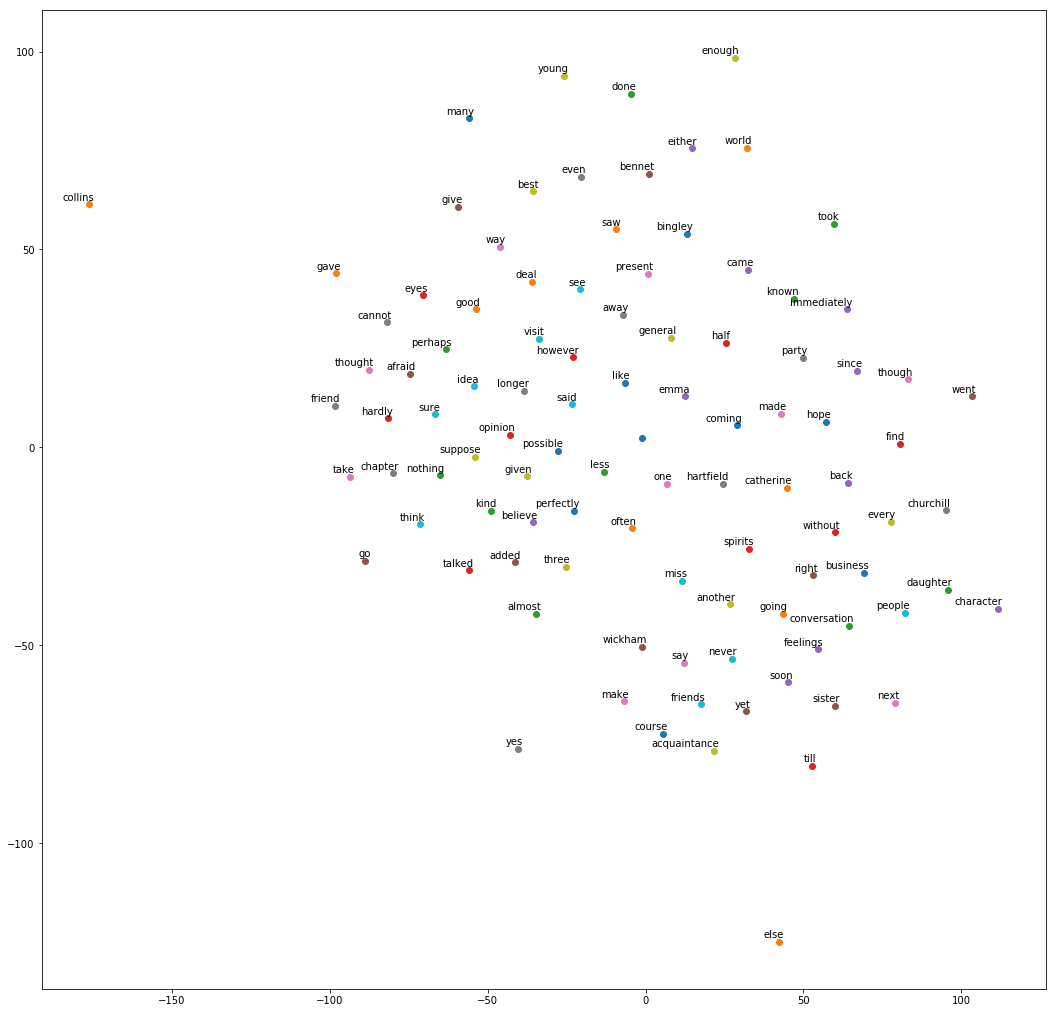

In [140]:


limit = 100
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in model.wv.vocab.keys():
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, model[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)

In [141]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

limit = 100
vector_dim = 300
characters = ['emma','bennet','elizabeth','knightley','darcy','bingley','catherine','harriet','fairfax','churchill',
             'lizzy','kitty']

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in characters:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, model[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(len(characters), vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
   # assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(8, 8))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=20.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)

KeyError: "word 'lizzy' not in vocabulary"